# 1. Data Exploration and Preprocessing :               
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.                 
•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.                      
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.            


In [1]:
# Load and explore the "blogs_categories.csv" dataset.

import pandas as pd

blogs_df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/blogs.csv')   # Load the dataset

blogs_df.head()   # Display the first five rows of the dataset

Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

In [2]:
blogs_df.info()   # Display information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [3]:
blogs_df.describe()   # Display summary statistics of the dataset.

Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100

In [4]:
blogs_df.isnull().sum()   # Check for missing values in the dataset.

Data      0
Labels    0
dtype: int64

In [5]:
blogs_df['Labels'].value_counts()   # Count the occurrences of each unique value in the 'Labels' column.

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [6]:
import string   # String operations.
import re       # Regular Expression.
from nltk.corpus import stopwords   # import Stopwords.
from nltk.tokenize import word_tokenize   # Tokenize words.
import nltk   # Natural Language Toolkit.
nltk.download('punkt')   # Download the Punkt tokenizer models.
nltk.download('stopwords')   # Download the stopwords.

# Preprocessing function.
def preprocess_text(text):
    # Remove metadata like 'Path:', 'Newsgroups:', and other non-content information.
    text = re.sub(r"Path:.*\n", "", text)  # remove 'Path: ...' lines
    text = re.sub(r"Newsgroups:.*\n", "", text)  # remove 'Newsgroups: ...' lines

    # Remove punctuation and convert to lowercase.
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text.
    words = word_tokenize(text)

    # Remove stopwords.
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Apply the preprocessing function to the 'blogs_df' column.
blogs_df['Cleaned_Data'] = blogs_df['Data'].apply(preprocess_text)

# Display the cleaned data.
blogs_df[['Data', 'Cleaned_Data', 'Labels']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data       Labels  
0  frankd012s658uucp frank odwyer subject islamic...  alt.atheism  
1  bilokcforumosrheedu bill conner subject omni m...  alt.atheism  
2  jimhcarsonuwashingtonedu james hogan subject y...  alt.atheism  
3  jbrownbatmanbmdtrwcom subject death penalty gu...  alt.atheism  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism

In [7]:
# OR

# Manual stopwords list (since we cannot download NLTK stopwords)
manual_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
    'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't",
    'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
    'won', "won't", 'wouldn', "wouldn't"
])

# Preprocessing function without external libraries
def manual_preprocess(text):
    # Remove metadata like 'Path:' and 'Newsgroups:'
    text = re.sub(r"Path:.*\n", "", text)
    text = re.sub(r"Newsgroups:.*\n", "", text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text (split by spaces)
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in manual_stopwords]

    return ' '.join(words)

# Apply the preprocessing function
blogs_df['Cleaned_Data'] = blogs_df['Data'].apply(manual_preprocess)

# Display the cleaned data
blogs_df[['Data', 'Cleaned_Data', 'Labels']].head()


Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data       Labels  
0  frankd012s658uucp frank odwyer subject islamic...  alt.atheism  
1  bilokcforumosrheedu bill conner subject omni m...  alt.atheism  
2  jimhcarsonuwashingtonedu james hogan subject y...  alt.atheism  
3  jbrownbatmanbmdtrwcom subject death penalty gu...  alt.atheism  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity

# Fit and transform the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(blogs_df['Cleaned_Data'])

In [9]:
# Display the shape of the TF-IDF matrix.
X_tfidf.shape

(2000, 1000)

In [10]:
# Convert the labels into a numeric format (Naive Bayes requires this)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(blogs_df['Labels'])

In [11]:
y_labels[:5]   # Display the first five encoded labels.

array([0, 0, 0, 0, 0])

#2. Naive Bayes Model for Text Classification
• Split the data into training and test sets.                               
• Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this    purpose.                                                          
• Train the model on the training set and make predictions on the test set.


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_labels, test_size=0.2, random_state=42)

In [15]:
from sklearn.naive_bayes import MultinomialNB  # Import the Multinomial Naive Bayes classifier.
from sklearn.metrics import classification_report, accuracy_score  # Import evaluation metrics.

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print('Train Accuracy:',nb_classifier.score(X_train,y_train)) # Train accuracy
print('Test Accuracy:',nb_classifier.score(X_test,y_test)) # Test accuracy

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Train Accuracy: 0.915625
Test Accuracy: 0.61
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.43      0.72      0.54        18
           comp.graphics       0.35      0.50      0.41        18
 comp.os.ms-windows.misc       0.67      0.73      0.70        22
comp.sys.ibm.pc.hardware       0.67      0.56      0.61        25
   comp.sys.mac.hardware       0.45      0.43      0.44        21
          comp.windows.x       0.71      0.48      0.57        25
            misc.forsale       0.67      0.56      0.61        18
               rec.autos       0.54      0.72      0.62        18
         rec.motorcycles       0.38      0.56      0.45        16
      rec.sport.baseball       0.62      0.72      0.67        18
        rec.sport.hockey       0.62      0.87      0.72        15
               sci.crypt       0.85      0.89      0.87        19
         sci.electronics       0.22      0.25      0.24        16
      

#3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.                                          
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.                                       
•	Examine the distribution of sentiments across different categories and summarize your findings.

In [17]:
!pip install textblob

In [25]:
from textblob import TextBlob

# Function to calculate sentiment (positive, negative, or neutral)
def get_sentiment(text):
    analysis = TextBlob(text)   # TextBlob - Easy-to-use and provides sentiment polarity scores.

    # Polarity ranges from -1 to 1 (negative to positive)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# 'blogs_df' is the preprocessed DataFrame
# Apply sentiment analysis to the 'Data' column
blogs_df['Sentiment'] = blogs_df['Data'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Now let's analyze sentiment distribution across categories
sentiment_distribution = blogs_df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0) #Each blog post's sentiment will be classified as positive, negative, or neutral based on polarity scores.

# Display the sentiment distribution table
print(sentiment_distribution)


Sentiment                 -0.583333  -0.483333  -0.406901  -0.400069  \
Labels                                                                 
alt.atheism                       0          0          0          0   
comp.graphics                     0          0          0          0   
comp.os.ms-windows.misc           0          0          0          0   
comp.sys.ibm.pc.hardware          0          0          0          0   
comp.sys.mac.hardware             0          0          1          1   
comp.windows.x                    0          0          0          0   
misc.forsale                      0          0          0          0   
rec.autos                         0          0          0          0   
rec.motorcycles                   0          0          0          0   
rec.sport.baseball                1          0          0          0   
rec.sport.hockey                  0          0          0          0   
sci.crypt                         0          0          0       

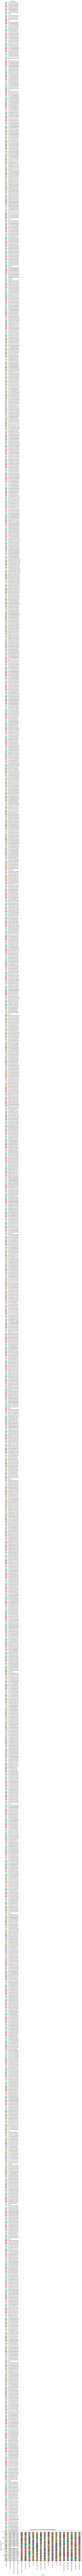

In [23]:
# Optionally, distribution plot.

import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Sentiment Distribution Across Blog Categories')
plt.ylabel('Number of Blog Posts')
plt.show()

# 4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.                              
•	Discuss the performance of the model and any challenges encountered during the classification process.                                
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [24]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model predictions
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.61

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.43      0.72      0.54        18
           comp.graphics       0.35      0.50      0.41        18
 comp.os.ms-windows.misc       0.67      0.73      0.70        22
comp.sys.ibm.pc.hardware       0.67      0.56      0.61        25
   comp.sys.mac.hardware       0.45      0.43      0.44        21
          comp.windows.x       0.71      0.48      0.57        25
            misc.forsale       0.67      0.56      0.61        18
               rec.autos       0.54      0.72      0.62        18
         rec.motorcycles       0.38      0.56      0.45        16
      rec.sport.baseball       0.62      0.72      0.67        18
        rec.sport.hockey       0.62      0.87      0.72        15
               sci.crypt       0.85      0.89      0.87        19
         sci.electronics       0.22      0.25      0.24        16
                 sci.med       0.73

**Discussion on Performance and Challenges -**

**Model Performance :**

Naive Bayes generally performs well for text classification due to its ability to handle high-dimensional data (like word features). It works particularly well for TF-IDF vectorized data.

**Challenges Encountered :**

**Class Imbalance :** If certain categories have more blog posts than others, the model might be biased toward those categories. This would result in lower precision or recall for minority classes.                           
**Feature Representation :** While TF-IDF captures term importance, some nuanced contextual meanings or word interactions are lost, as Naive Bayes treats each feature independently.                                        
**Outliers or Noisy Data :** Text data often contains noise (irrelevant words, abbreviations), which could affect classification. Preprocessing helps, but some noise may remain.

**Reflection on Sentiment Analysis Results and Implications -**

**Sentiment Distribution :**

**Positive Sentiment :** If the majority of blog posts are classified as positive, it could indicate that the topics are generally discussed in a favorable or optimistic manner.                                      
**Negative Sentiment :** A large portion of negative sentiments might indicate controversial topics or strong opinions.                            
**Neutral Sentiment :** If many posts are neutral, it may suggest that discussions are more informative and factual without much emotional content.

**Implications :**

**Content Tone :** The sentiment analysis provides insight into how bloggers are expressing their views. For instance, if a particular category has predominantly negative sentiment, it might indicate dissatisfaction with the topic.                                          
**Category-Specific Trends :** If specific blog categories tend to lean heavily toward positive, negative, or neutral sentiments, this could be a useful indicator for understanding the nature of the discussions within those categories.